In [28]:
import numpy as np
import matplotlib.pyplot as plt

Considering a SCARA Manipulator

In [29]:
def inverse_kinematics(x,y,z):
    theta2=np.arccos((x**2+y**2-l1**2-l2**2)/(2*l1*l2))
    theta1=np.arctan2(y,x)-np.arctan2(l2*np.sin(theta2),(l1+l2*np.cos(theta2)))
    d3=-z
    return theta1,theta2,d3

In [30]:
l1=0.25 #length of link in meters
l3=0.25 #length of link in meters
l2=0.25 #length of link in meters

A=[.4  ,0.06,.1]
B=[.4,.01,.1]
C=[.35,.01,.1]
D=[.35,.06,.1]

In [32]:
points=np.array([A,B,C,D])
timetaken=100
t_smol=np.linspace(0,timetaken,timetaken)

def genlinear_trajectory(initial,final,t):
    traj=initial+(final-initial)*t/timetaken
    return traj

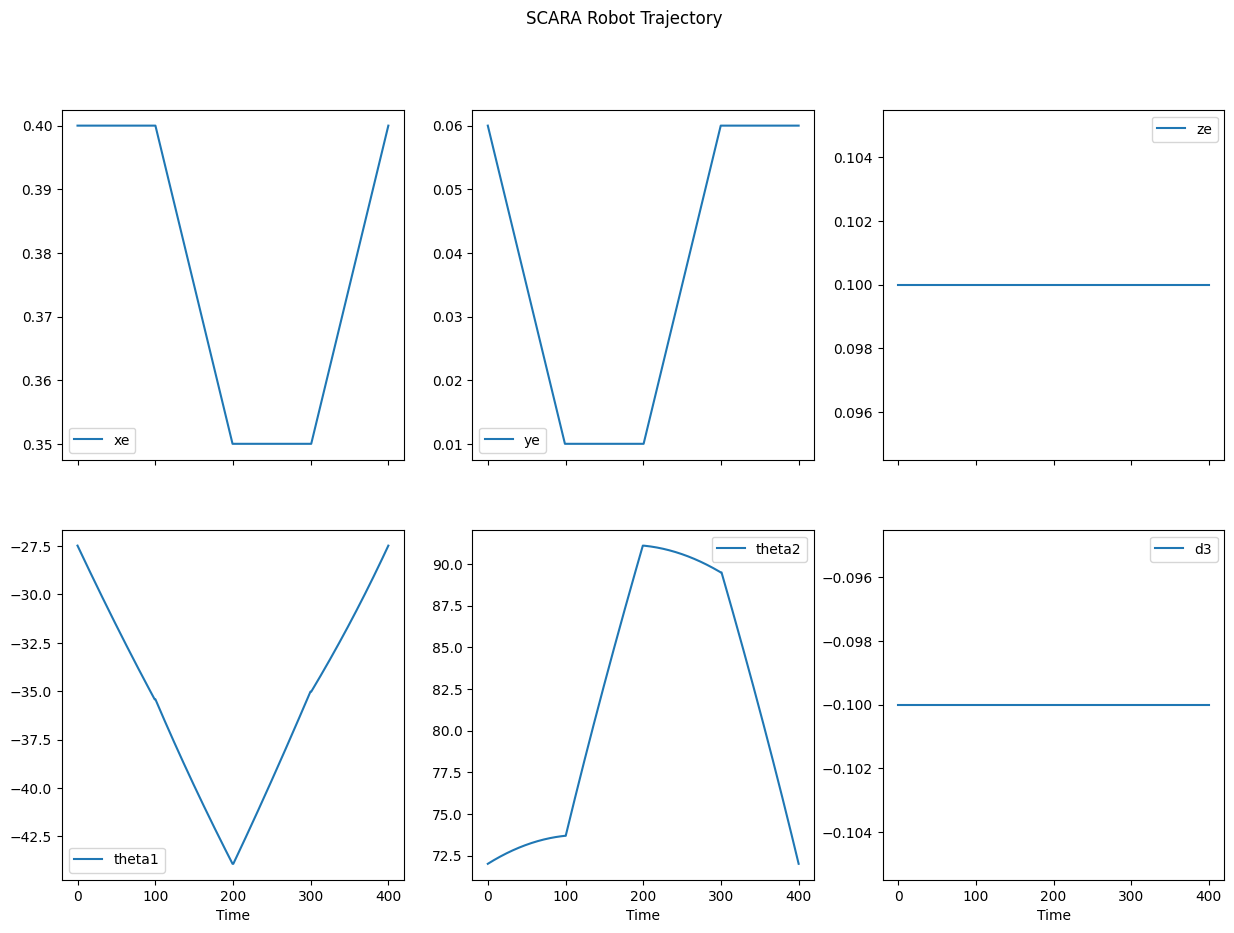

In [33]:
theta1=[]
theta2=[]
d3=[]
xe=[]
ye=[]
ze=[]

for i in range(4):
    for t in t_smol:
        x,y,z=genlinear_trajectory(points[i,:],points[(i+1)%4,:],t)
        xe.append(x)
        ye.append(y)
        ze.append(z)
        q=inverse_kinematics(x,y,z)
        theta1.append(q[0])
        theta2.append(q[1])
        d3.append(q[2])

tnet=np.linspace(0,4*timetaken,4*timetaken)

fig, axs = plt.subplots(2, 3, figsize=(15, 10), sharex=True)

# Plot xe, ye, ze, theta1, theta2, d3 against tnet
axs[0, 0].plot(tnet, xe, label='xe')
axs[0, 1].plot(tnet, ye, label='ye')
axs[0, 2].plot(tnet, ze, label='ze')
axs[1, 0].plot(tnet, np.rad2deg(theta1), label='theta1')
axs[1, 1].plot(tnet, np.rad2deg(theta2), label='theta2')
axs[1, 2].plot(tnet, d3, label='d3')

axs[1, 0].set_xlabel('Time')
axs[1, 1].set_xlabel('Time')
axs[1, 2].set_xlabel('Time')
fig.suptitle('SCARA Robot Trajectory')

for ax_row in axs:
    for ax in ax_row:
        ax.legend()

plt.show()